#  Hierarchical Clustering
  1. Hierarchical Clustering is an unsupervised machine learning technique used to build a hierarchy (tree) of clusters. It does not require specifying the number of clusters in advance and is visualized using a dendrogram.

  2. Two Types:
     1. Agglomerative (Bottom-Up) – Most common

          Start with each data point as a separate cluster.

          Merge the closest pairs of clusters step by step.

          Repeat until one big cluster remains.

     2. Divisive (Top-Down) – Rarely used

          Start with one big cluster containing all data.

          Split into smaller clusters recursively.

3. Output: Dendrogram

   
       A dendrogram shows how clusters are formed. You can cut the dendrogram at a specific height to get the desired number of clusters.



 4. Threshold

    
          The dendrogram shows how close data points or clusters are (based on linkage).

          When you cut the dendrogram horizontally at a specific distance (threshold), each vertical line cut by this threshold defines a separate cluster.

  

# Hierarichical Clustering Implementation

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn import datasets

In [64]:
# Import Iris Dataset
iris = datasets.load_iris()

In [66]:
iris_data = pd.DataFrame(iris.data)

In [68]:
iris_data.columns = iris.feature_names

In [70]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [72]:
# Standardization 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [74]:
X_scaled = scaler.fit_transform(iris_data)

In [76]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [78]:
X_scaled.shape

(150, 4)

In [80]:
## Apply the PCA(Principal Component Analysis) for here Reduce Dimensionality
from sklearn.decomposition import PCA

pca = PCA(n_components=2)   # n_components= 2 menas our 4 dimenstion data convert in 2 dimention
pca

In [98]:
pca_scaled=pca.fit_transform(X_scaled)

In [100]:
pca_scaled.shape

(150, 2)

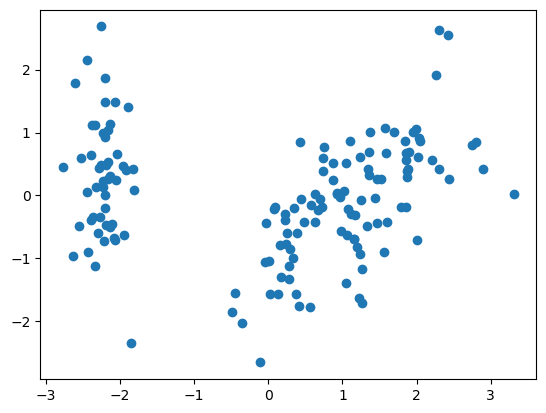

In [102]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])
plt.show()

In [104]:
# Agglomerative Clustering 
## To convert a Dendrogram

import scipy.cluster.hierarchy as sc


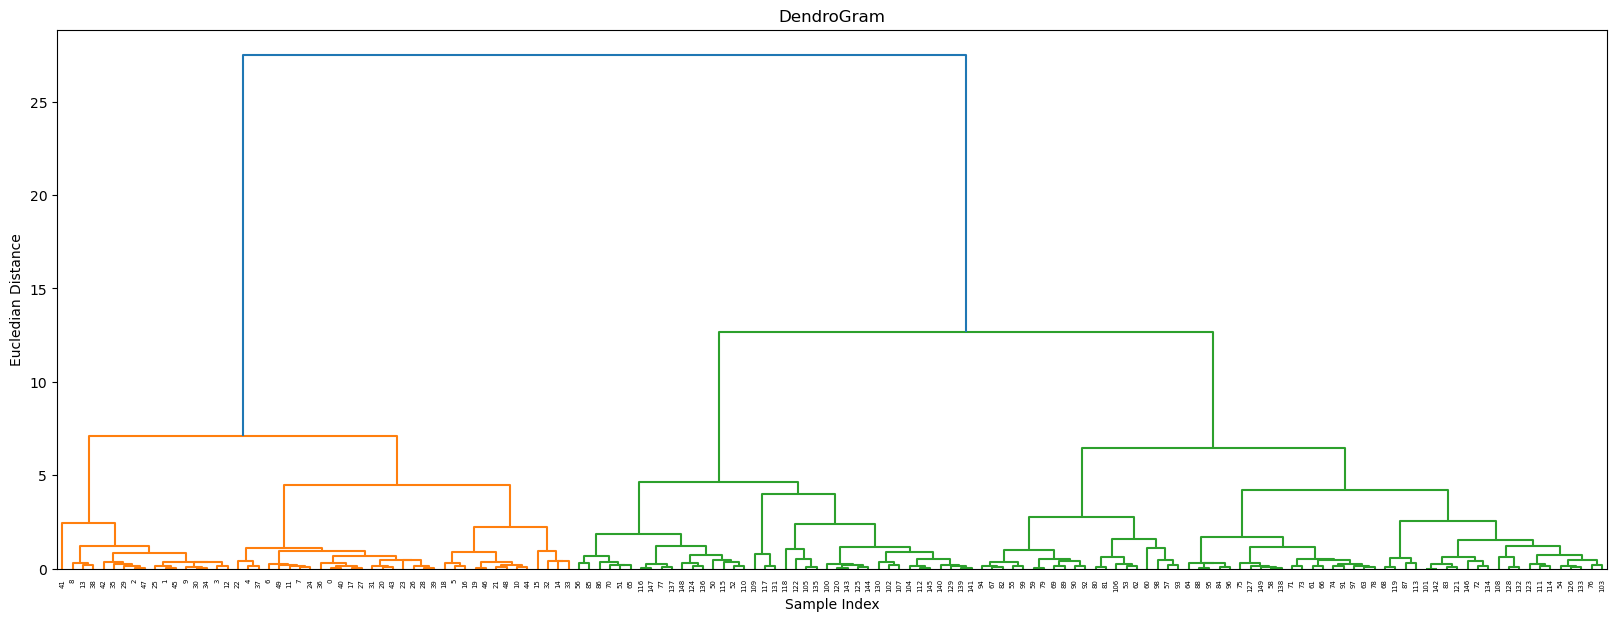

In [124]:
# plot the DendroGram
plt.figure(figsize=(20,7))
plt.title("Dendrogram")

# plot the DendroGram
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('DendroGram')
plt.xlabel('Sample Index')
plt.ylabel('Eucledian Distance')
plt.show()

In [128]:
from sklearn.cluster import AgglomerativeClustering

In [132]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')  #affinity parameter in AgglomerativeClustering has been deprecated and replaced with metric. 
cluster.fit(pca_scaled)


AgglomerativeClustering()

In [134]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

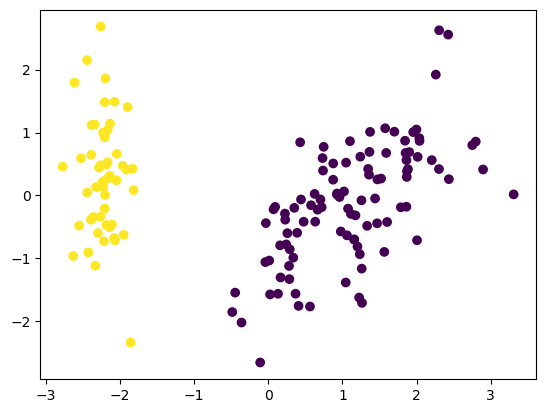

In [136]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)
plt.show()

In [138]:
# Finaly for Performance Metrics we used Silhouett_score in Clustering Algorithms 
from sklearn.metrics import silhouette_score

In [148]:
silhouette_coefficients = []

# Notice you start at 2 clusters for the Silhouette coefficient
for k in range(2,11):
    Aggo=AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
    Aggo.fit(X_scaled)
    score = silhouette_score(X_scaled,Aggo.labels_)
    silhouette_coefficients.append(score)
    

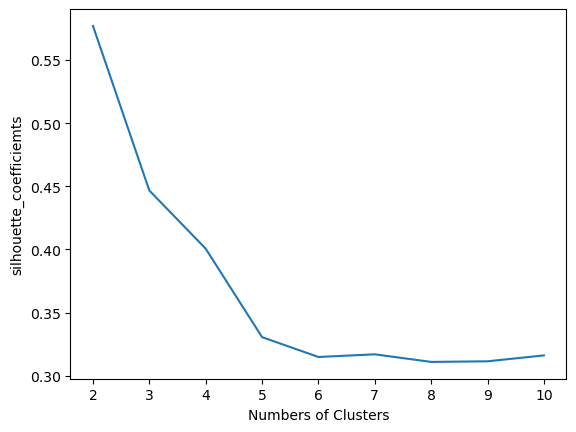

In [150]:
# Plotting Silhouette Score
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Numbers of Clusters')
plt.ylabel('silhouette_coefficiemts')
plt.show()